[svm学习，讲的很好的一篇推导]：（https://blog.csdn.net/c406495762/article/details/78072313#2-smo%E7%AE%97%E6%B3%95）

[svm基础-推导，与上面的差不多]：https://zhuanlan.zhihu.com/p/31886934
                            https://www.jianshu.com/p/95e56d5126fd?from=singlemessage
[拉格朗日乘子法]：https://www.zhihu.com/question/38586401
[核的选择]https://www.zhihu.com/question/21883548

[api]https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
#C引入正则化系数C，可以理解允许划分错误的权重（越大，越不允许出错），当C较小时，允许少量样例划分错误
#隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多。支持向量的个数影响训练与预测的速度，与高斯核的带宽有关。
#https://blog.csdn.net/wusecaiyun/article/details/49681431

In [9]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X,len(y),y)

Automatically created module for IPython interactive environment
[[0.06975642]
 [0.77538876]
 [0.89519127]
 [1.06301955]
 [1.10612884]
 [1.24189925]
 [1.45253669]
 [1.58792794]
 [1.77279961]
 [1.77451291]
 [1.84614699]
 [1.89363875]
 [2.14877983]
 [2.31539371]
 [2.38107442]
 [2.46606032]
 [2.51377695]
 [2.56999094]
 [2.67405373]
 [2.6762422 ]
 [2.88627444]
 [2.91891571]
 [2.94839578]
 [3.02333064]
 [3.07243807]
 [3.08562104]
 [3.11962179]
 [3.20793925]
 [3.38333953]
 [3.43066133]
 [3.62467015]
 [3.68717261]
 [3.77510574]
 [3.7783466 ]
 [3.90182665]
 [4.0111622 ]
 [4.02427864]
 [4.11059299]
 [4.52480361]
 [4.53683286]] 40 [ 0.06969986  0.69999376  0.78032871  0.87382768  0.89397062  0.94639916
  0.99301547  0.99985326  0.97966662  0.97932144  0.96232992  0.94833745
  0.83756604  0.73536081  0.68929699  0.62531282  0.58737839  0.54097984
  0.4506907   0.44873601  0.25255332  0.22084126  0.19199727  0.11798654
  0.06909948  0.05594239  0.02196909 -0.06629793 -0.23939907 -0.28505966
 -0.46

In [10]:
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))
print(len(y),y)

40 [-0.09626241  0.69999376  0.78032871  0.87382768  0.89397062  2.25413224
  0.99301547  0.99985326  0.97966662  0.97932144  0.99669996  0.94833745
  0.83756604  0.73536081  0.68929699  0.52917345  0.58737839  0.54097984
  0.4506907   0.44873601 -0.40227129  0.22084126  0.19199727  0.11798654
  0.06909948 -0.21071678  0.02196909 -0.06629793 -0.23939907 -0.28505966
  0.75611864 -0.51891394 -0.59197979 -0.59458866 -0.68909104 -0.87540028
 -0.77244747 -0.82432019 -0.9824574  -0.98462956]


In [7]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [21]:
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['c', 'c', 'g']

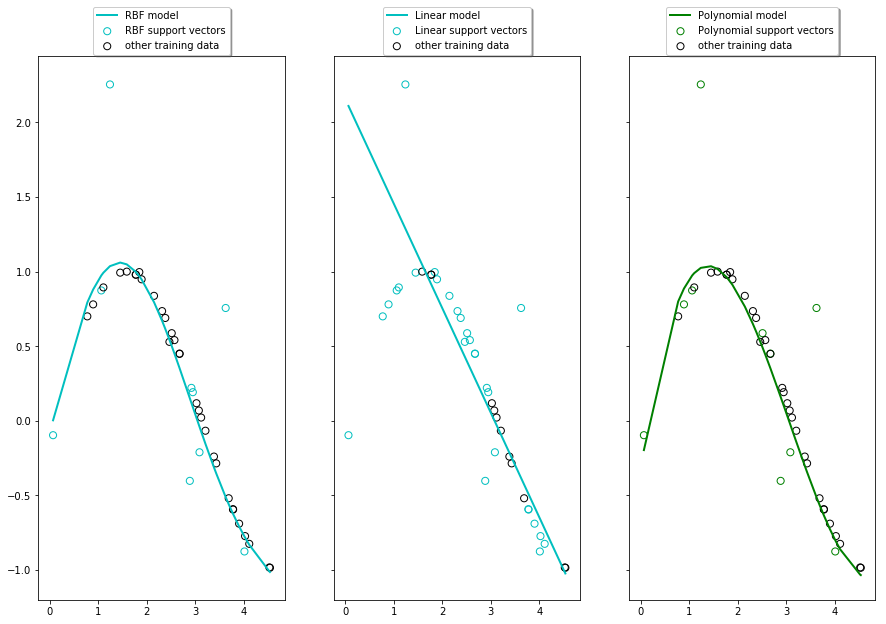

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

In [19]:
print(svr.support_)

[ 0  3  5 20 21 22 25 30 35]


In [20]:
np.setdiff1d(np.arange(len(X)), svr.support_)

array([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39])